# Origin Text: Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

-----------Ideas-----------
- Airport stats? 
- Airline stats
- Avg delay per airline
- Avg delay per airport
- Avg delay per state?
- Avg delay per month
- Hour business / traffic (do we want to break this up into origin airport / destination airport for arrival time)
- 

**Passengers Table**
- Seats avaiable (hypothesis: more full the flight, the more likely it is to be delayed)
- Aircraft Type (maybe certain aircrafts are engaged in passengers vs freigh and are subject to ba higher late avg)
-

**One-Hot Encodes**
- State
    - Could we do State type to reduce dimensions? (busy, not busy?)
- Airport
    - Could we do Aiport cluster type? and we use as a feature
- fl_num... could we do stats about the flight number? is the flight number for each route consistent?
- Weather for dates... we can get the forecast for 14 days.... so 7day prediction is ok 


**General Questions**
- Can we use clusering to create categories for large category features? 

### Modulation

1. DB Connection
2. Additional table Generation (e.g. unique airports table)
    - e.g. weather api data for flights... maybe this doesnt need to be a table here, but only pull for spect days of prediction test data (jan week1)
3. Data cleaning
4. EDA report class 
    - General summary to view
    - Visuals to explore the data

5. Feature Creation/Selection/Reduction
    - Generate additional columns for the training/testing data
        - This needs to be able to be applied to new unseen data... e.g. newdata.get_features()
    - Generate visual outputs for selection PCA, elbow plots, cumsum, etc
    - Maybe a cluster to classify records into certain cluster for a feature
 
6. Modeling Module
    - Baseline model generation w base features
    - Generate loop/gridsearch to find best model for target variable
    - Grid search for the best model to then hyperparamter tune
    - Evaluation output of model vs baseline
        - what is our evaluation metric going to be? 


### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.

# Joe Play

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('../../data/baseline_features_cleaned_v2.csv', index_col='Unnamed: 0')

In [12]:
df.shape

(124922, 11)

In [7]:
df.head()

,arr_delay,distance,month,o_hour,a_hour,Long,Medium,Short,speed,median_d_delay,median_a_delay
0,0.0,554,6,10.0,12.0,0,1,0,5.43,-3.0,-8.0
1,0.0,554,6,7.0,9.0,0,1,0,5.04,-3.0,-8.0
2,0.0,554,6,15.0,16.0,0,1,0,5.18,-3.0,-8.0
3,0.0,554,6,6.0,7.0,0,1,0,5.13,-3.0,-8.0
4,2.0,554,11,17.0,18.0,0,1,0,5.13,-3.0,-8.0


<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

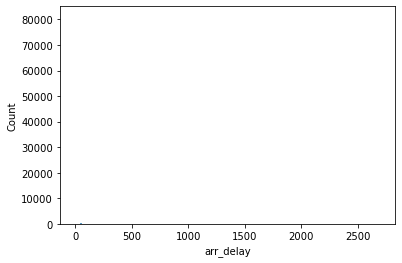

In [9]:
sns.histplot(df, x='arr_delay')

In [13]:
# remove outliers

df = df.loc[df['arr_delay'] <= 350 ]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124626 entries, 0 to 124921
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   arr_delay       124626 non-null  float64
 1   distance        124626 non-null  int64  
 2   month           124626 non-null  int64  
 3   o_hour          124626 non-null  float64
 4   a_hour          124626 non-null  float64
 5   Long            124626 non-null  int64  
 6   Medium          124626 non-null  int64  
 7   Short           124626 non-null  int64  
 8   speed           124626 non-null  float64
 9   median_d_delay  124626 non-null  float64
 10  median_a_delay  124626 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 11.4 MB


## 0. Scaling

In [14]:
from sklearn.preprocessing import RobustScaler

In [16]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

In [22]:
df_pd = pd.DataFrame(df_scaled, columns=df.columns)
df_pd.head()

,arr_delay,distance,month,o_hour,a_hour,Long,Medium,Short,speed,median_d_delay,median_a_delay
0,0.00,-0.075529,-0.166667,-0.375,-0.333333,0.0,1.0,0.0,0.149758,-1.0,-1.0
1,0.00,-0.075529,-0.166667,-0.750,-0.666667,0.0,1.0,0.0,-0.038647,-1.0,-1.0
2,0.00,-0.075529,-0.166667,0.250,0.111111,0.0,1.0,0.0,0.028986,-1.0,-1.0
3,0.00,-0.075529,-0.166667,-0.875,-0.888889,0.0,1.0,0.0,0.004831,-1.0,-1.0
4,0.25,-0.075529,0.666667,0.500,0.333333,0.0,1.0,0.0,0.004831,-1.0,-1.0


In [30]:
df_pd.describe()

,arr_delay,distance,month,o_hour,a_hour,Long,Medium,Short,speed,median_d_delay,median_a_delay
count,124626.000000,124626.000000,124626.000000,124626.000000,124626.000000,124626.000000,124626.000000,124626.000000,124626.000000,124626.000000,124626.000000
mean,1.564224,0.247169,-0.068366,0.027447,-0.056586,0.249547,0.493220,0.257234,-0.061308,-0.281595,-0.034481
std,4.189876,0.880534,0.565484,0.627644,0.597247,0.432752,0.499956,0.437111,0.700401,1.613394,0.887419
min,0.000000,-0.865559,-1.000000,-1.625000,-1.666667,0.000000,0.000000,0.000000,-2.420290,-14.000000,-7.000000
25%,0.000000,-0.394260,-0.500000,-0.500000,-0.555556,0.000000,0.000000,0.000000,-0.541063,-1.000000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.605740,0.500000,0.500000,0.444444,0.000000,1.000000,1.000000,0.458937,0.000000,0.500000
max,43.750000,6.783988,0.833333,1.375000,1.000000,1.000000,1.000000,1.000000,2.352657,50.000000,53.250000


In [23]:
X = np.array(df_pd.drop('arr_delay', axis=1))
y = np.array(df_pd['arr_delay'])

In [36]:
# experiment for standard scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_test_scaled = scaler.fit_transform(df)
temp = pd.DataFrame(df_test_scaled, columns=df.columns)
temp.head()

,arr_delay,distance,month,o_hour,a_hour,Long,Medium,Short,speed,median_d_delay,median_a_delay
0,-0.373336,-0.366481,-0.173835,-0.641206,-0.463373,-0.576652,1.013654,-0.588488,0.301352,-0.445278,-1.088012
1,-0.373336,-0.366481,-0.173835,-1.238681,-1.021491,-0.576652,1.013654,-0.588488,0.032354,-0.445278,-1.088012
2,-0.373336,-0.366481,-0.173835,0.354586,0.280785,-0.576652,1.013654,-0.588488,0.128917,-0.445278,-1.088012
3,-0.373336,-0.366481,-0.173835,-1.437839,-1.393570,-0.576652,1.013654,-0.588488,0.094430,-0.445278,-1.088012
4,-0.313668,-0.366481,1.299834,0.752903,0.652864,-0.576652,1.013654,-0.588488,0.094430,-0.445278,-1.088012


In [37]:
temp.describe()

,arr_delay,distance,month,o_hour,a_hour,Long,Medium,Short,speed,median_d_delay,median_a_delay
count,1.246260e+05,1.246260e+05,1.246260e+05,1.246260e+05,1.246260e+05,1.246260e+05,1.246260e+05,1.246260e+05,1.246260e+05,1.246260e+05,1.246260e+05
mean,-9.193508e-18,-4.013786e-17,9.361700e-17,-8.939796e-17,4.059397e-17,3.831341e-17,-3.101562e-17,-5.838234e-17,-3.338740e-16,6.796069e-17,-2.535983e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.733357e-01,-1.263702e+00,-1.647505e+00,-2.632790e+00,-2.695847e+00,-5.766523e-01,-9.865301e-01,-5.884882e-01,-3.368058e+00,-8.502860e+00,-7.849219e+00
25%,-3.733357e-01,-7.284578e-01,-7.633035e-01,-8.403641e-01,-8.354519e-01,-5.766523e-01,-9.865301e-01,-5.884882e-01,-6.849745e-01,-4.452778e-01,-5.245782e-01
50%,-3.733357e-01,-2.807051e-01,1.208985e-01,-4.373060e-02,9.474539e-02,-5.766523e-01,-9.865301e-01,-5.884882e-01,8.753288e-02,1.745362e-01,3.885572e-02
75%,-1.346642e-01,4.072215e-01,1.005100e+00,7.529029e-01,8.389033e-01,-5.766523e-01,1.013654e+00,1.699269e+00,7.427847e-01,1.745362e-01,6.022896e-01
max,1.006854e+01,7.423729e+00,1.594568e+00,2.147012e+00,1.769101e+00,1.734147e+00,1.013654e+00,1.699269e+00,3.446560e+00,3.116524e+01,6.004457e+01


# 0. Split into train / test

In [20]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69) 

In [29]:
print(X_train.shape)
print(y_train.shape)

(87238, 10)
(87238,)


## 1. Base Regression Model

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression()
reg.fit(X_train,y_train)

reg.score(X_test, y_test)

0.03998639031262663

# 2. Regression with more features

In [38]:
df = pd.read_csv('../../data/features_tuesday.csv', index_col='Unnamed: 0')
df.head()

,arr_delay,crs_elapsed_time,distance,month,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_mean_arr_delay,air_arr_late_perc,hour_count,hour_arr_delay,hour_late_perc,tail_count,tail_arr_delay,tail_late_perc,carrier_count,carrier_arr_delay,carrier_carrier_delay,carrier_late_perc
0,0.0,102,554,6,3,10.0,12.0,0,5.43,15.02,0.342,10.45,0.288,8222,10.50,0.310,22,4.45,0.273,27900,12.33,24.23,0.291
1,0.0,52,134,6,2,10.0,10.0,0,2.58,11.24,0.311,19.68,0.400,8222,10.50,0.310,22,4.45,0.273,27900,12.33,24.23,0.291
2,0.0,67,259,5,5,6.0,7.0,0,3.87,18.77,0.293,10.45,0.288,9129,7.46,0.238,22,4.45,0.273,27900,12.33,24.23,0.291
3,0.0,58,106,3,1,6.0,7.0,0,1.83,8.40,0.283,10.45,0.288,9129,7.46,0.238,22,4.45,0.273,27900,12.33,24.23,0.291
4,0.0,68,214,7,0,17.0,18.0,0,3.15,15.11,0.305,10.45,0.288,7436,18.94,0.418,22,4.45,0.273,27900,12.33,24.23,0.291


In [40]:
df.describe()
### hummmmmm... seems I didnt remove outliers for arr_delay... 

,arr_delay,crs_elapsed_time,distance,month,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_mean_arr_delay,air_arr_late_perc,hour_count,hour_arr_delay,hour_late_perc,tail_count,tail_arr_delay,tail_late_perc,carrier_count,carrier_arr_delay,carrier_carrier_delay,carrier_late_perc
count,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000
mean,13.959236,137.785141,767.200709,6.588647,2.939886,13.139467,14.682846,0.351246,4.990982,13.689726,0.351283,13.959977,0.351263,7241.785013,13.959338,0.351343,24.773590,13.959111,0.351231,23476.127532,13.959557,20.703041,0.351213
std,46.919638,71.545075,582.964225,3.392189,1.995983,4.906947,5.185609,0.477362,1.450906,4.554498,0.047819,4.213938,0.041847,1570.159474,4.330220,0.063576,8.574998,11.306757,0.120192,9152.962954,3.096536,3.261743,0.035293
min,0.000000,20.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,25.000000,7.460000,0.219000,1.000000,0.000000,0.000000,134.000000,6.530000,14.960000,0.291000
25%,0.000000,87.000000,342.000000,4.000000,1.000000,9.000000,11.000000,0.000000,4.000000,11.240000,0.325000,11.680000,0.335000,6922.000000,9.510000,0.297000,19.000000,6.870000,0.273000,21152.000000,12.260000,20.400000,0.355000
50%,0.000000,119.000000,604.000000,7.000000,3.000000,13.000000,15.000000,0.000000,5.110000,13.510000,0.353000,13.140000,0.353000,7436.000000,14.230000,0.361000,25.000000,11.220000,0.348000,24089.000000,14.400000,20.400000,0.362000
75%,8.000000,167.000000,1005.000000,10.000000,5.000000,17.000000,19.000000,1.000000,6.070000,15.580000,0.382000,15.780000,0.373000,8222.000000,18.290000,0.417000,30.000000,17.720000,0.429000,32325.000000,15.920000,24.230000,0.368000
max,2692.000000,1512.000000,5095.000000,12.000000,6.000000,24.000000,24.000000,1.000000,9.990000,124.440000,1.000000,179.000000,1.000000,9129.000000,27.640000,0.444000,61.000000,247.000000,1.000000,32325.000000,21.380000,26.130000,0.434000


In [42]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
df_pd = pd.DataFrame(df_scaled, columns=df.columns)
df_pd.head()

,arr_delay,crs_elapsed_time,distance,month,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_mean_arr_delay,air_arr_late_perc,hour_count,hour_arr_delay,hour_late_perc,tail_count,tail_arr_delay,tail_late_perc,carrier_count,carrier_arr_delay,carrier_carrier_delay,carrier_late_perc
0,0.0,-0.2125,-0.075415,-0.166667,0.00,-0.375,-0.375,0.0,0.154589,0.347926,-0.192982,-0.656098,-1.710526,0.604615,-0.424829,-0.425,-0.272727,-0.623963,-0.480769,0.34109,-0.565574,1.0,-5.461538
1,0.0,-0.8375,-0.708899,-0.166667,-0.25,-0.375,-0.625,0.0,-1.222222,-0.523041,-0.736842,1.595122,1.236842,0.604615,-0.424829,-0.425,-0.272727,-0.623963,-0.480769,0.34109,-0.565574,1.0,-5.461538
2,0.0,-0.6500,-0.520362,-0.333333,0.50,-0.875,-1.000,0.0,-0.599034,1.211982,-1.052632,-0.656098,-1.710526,1.302308,-0.771071,-1.025,-0.272727,-0.623963,-0.480769,0.34109,-0.565574,1.0,-5.461538
3,0.0,-0.7625,-0.751131,-0.666667,-0.50,-0.875,-1.000,0.0,-1.584541,-1.177419,-1.228070,-0.656098,-1.710526,1.302308,-0.771071,-1.025,-0.272727,-0.623963,-0.480769,0.34109,-0.565574,1.0,-5.461538
4,0.0,-0.6375,-0.588235,0.000000,-0.75,0.500,0.375,0.0,-0.946860,0.368664,-0.842105,-0.656098,-1.710526,0.000000,0.536446,0.475,-0.272727,-0.623963,-0.480769,0.34109,-0.565574,1.0,-5.461538


In [43]:
df_pd.describe()

,arr_delay,crs_elapsed_time,distance,month,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_mean_arr_delay,air_arr_late_perc,hour_count,hour_arr_delay,hour_late_perc,tail_count,tail_arr_delay,tail_late_perc,carrier_count,carrier_arr_delay,carrier_carrier_delay,carrier_late_perc
count,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000,125012.000000
mean,1.744904,0.234814,0.246155,-0.068559,-0.015029,0.017433,-0.039644,0.351246,-0.057497,0.041412,-0.030127,0.199994,-0.045703,-0.149396,-0.030827,-0.080477,-0.020583,0.252453,0.020709,-0.054853,-0.120340,0.079123,-0.829779
std,5.864955,0.894313,0.879282,0.565365,0.498996,0.613368,0.648201,0.477362,0.700921,1.049424,0.838937,1.027790,1.101247,1.207815,0.493191,0.529797,0.779545,1.042097,0.770463,0.819204,0.846048,0.851630,2.714861
min,0.000000,-1.237500,-0.886878,-1.000000,-0.750000,-1.625000,-1.875000,0.000000,-2.415459,-3.112903,-6.192982,-3.204878,-9.289474,-5.700769,-0.771071,-1.183333,-2.181818,-1.034101,-2.230769,-2.144008,-2.150273,-1.420366,-5.461538
25%,0.000000,-0.400000,-0.395173,-0.500000,-0.500000,-0.500000,-0.500000,0.000000,-0.536232,-0.523041,-0.491228,-0.356098,-0.473684,-0.395385,-0.537585,-0.533333,-0.545455,-0.400922,-0.480769,-0.262866,-0.584699,0.000000,-0.538462
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.600000,0.604827,0.500000,0.500000,0.500000,0.500000,1.000000,0.463768,0.476959,0.508772,0.643902,0.526316,0.604615,0.462415,0.466667,0.454545,0.599078,0.519231,0.737134,0.415301,1.000000,0.461538
max,336.500000,17.412500,6.773756,0.833333,0.750000,1.375000,1.125000,1.000000,2.357488,25.559908,11.350877,40.453659,17.026316,1.302308,1.527335,0.691667,3.272727,21.730876,4.179487,0.737134,1.907104,1.496084,5.538462


In [45]:
X = np.array(df_pd.drop('arr_delay', axis=1))
y = np.array(df_pd['arr_delay'])


In [46]:
# split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69) 
print(X_train.shape)
print(y_train.shape)

(87508, 22)
(87508,)


In [47]:
# regression 
reg = LinearRegression()
reg.fit(X_train,y_train)

reg.score(X_test, y_test)

0.21924158709871644